In [2]:
%load_ext autoreload
%autoreload 2

In [91]:
import os
from datetime import datetime

import dask.dataframe as dd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import pandas as pd
from matplotlib import collections, colors
from matplotlib.colors import to_rgba
from mpl_toolkits.basemap import Basemap
from sklearn.neighbors import KernelDensity
from tqdm import tqdm

from real_analysis import (
    algo_data_file,
    calculate_azimean,
    calculate_distance_around_tc,
    calculate_theta_around_tc,
    create_tc_plots,
    crop,
    get_coordinates,
    get_plot_filename,
    get_qgrid,
    interpolate_data,
    outdir,
    plot_azimean,
)
from utils import load_complete_datasets, load_simulation_data

In [111]:
from plotting import plot_max_intensity_coloring

In [152]:
bmap_params = dict(
    llcrnrlon=-113.0,
    llcrnrlat=-20.0,
    urcrnrlon=40.0,
    urcrnrlat=60.0,
    projection="lcc",
    lat_1=20.0,
    lat_2=40.0,
    lon_0=-60.0,
    resolution="l",
    area_thresh=1000.0,
)


def plot_occurrence(
    df,
    filename=None,
    min_lifetime=3,
    bmap_params=bmap_params,
    title=None,
):
    data = df.groupby("tc_id").filter(lambda x: len(x) >= min_lifetime)

    fig = plt.figure(figsize=(9, 6), dpi=150)
    ax1 = fig.add_subplot(1, 1, 1)

    mp = Basemap(
        **bmap_params,
        ax=ax1,
    )
    mp.drawcoastlines()
    mp.drawparallels(np.arange(10, 70, 20), labels=[1, 1, 0, 0])
    mp.drawmeridians(np.arange(-140, 20, 20), labels=[0, 0, 0, 1])

    grouped = data.groupby("tc_id")
    for name, group in tqdm(grouped):
        lon, lat = mp(group["lon"].values, group["lat"].values)
        points = np.array([lon, lat]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        mp.scatter(lon[0], lat[0], marker="x", color="k")
        colors = cm.winter(group.noccs)
        lc = collections.LineCollection(segments, colors=colors)
        # mp.scatter(positions[0][0], positions[1][0], marker="x", color="k", linewidths=0.75)
        ax1.add_collection(lc)
    #from matplotlib.lines import Line2D

    #custom_lines = [
     #   Line2D([0], [0], color=color, lw=4) for color in ss_scale_rgba.values()
    #]
    #labels = [f"Category {label:2}" for label in ss_scale_rgba.keys()]

    #ax1.legend(custom_lines, labels)
    #sm = plt.cm.ScalarMappable(cmap=cm.winter)

    plt.colorbar(mappable=sm)
    plt.show()
    if title:
        plt.title(title)
    if filename:
        fig.savefig(filename)
    return fig

In [154]:
bmap_params = dict(
    llcrnrlon=-113.0,
    llcrnrlat=-20.0,
    urcrnrlon=40.0,
    urcrnrlat=60.0,
    projection="lcc",
    lat_1=20.0,
    lat_2=40.0,
    lon_0=-60.0,
    resolution="l",
    area_thresh=1000.0,
)


def plot_occurrence(
    df,
    filename=None,
    min_lifetime=3,
    bmap_params=bmap_params,
    title=None,
):
    data = df.groupby("tc_id").filter(lambda x: len(x) >= min_lifetime)



    grouped = data.groupby("tc_id")
    for name, group in grouped:
        print(name)
        fig = plt.figure(figsize=(9, 6), dpi=150)
        ax1 = fig.add_subplot(1, 1, 1)

        mp = Basemap(
            **bmap_params,
            ax=ax1,)
        mp.drawcoastlines()
        mp.drawparallels(np.arange(10, 70, 20), labels=[1, 1, 0, 0])
        mp.drawmeridians(np.arange(-140, 20, 20), labels=[0, 0, 0, 1])
        lon, lat = mp(group["lon"].values, group["lat"].values)
        points = np.array([lon, lat]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        mp.scatter(lon[0], lat[0], marker="x", color="k")
        colors = cm.winter(group.noccs)
        lc = collections.LineCollection(segments, colors=colors)
        # mp.scatter(positions[0][0], positions[1][0], marker="x", color="k", linewidths=0.75)
        ax1.add_collection(lc)
        sm = plt.cm.ScalarMappable(cmap=cm.winter)

        plt.colorbar(mappable=sm)
        plt.show()
    #from matplotlib.lines import Line2D

    #custom_lines = [
     #   Line2D([0], [0], color=color, lw=4) for color in ss_scale_rgba.values()
    #]
    #labels = [f"Category {label:2}" for label in ss_scale_rgba.keys()]

    #ax1.legend(custom_lines, labels)

    if title:
        plt.title(title)
    if filename:
        fig.savefig(filename)
    return fig

641425


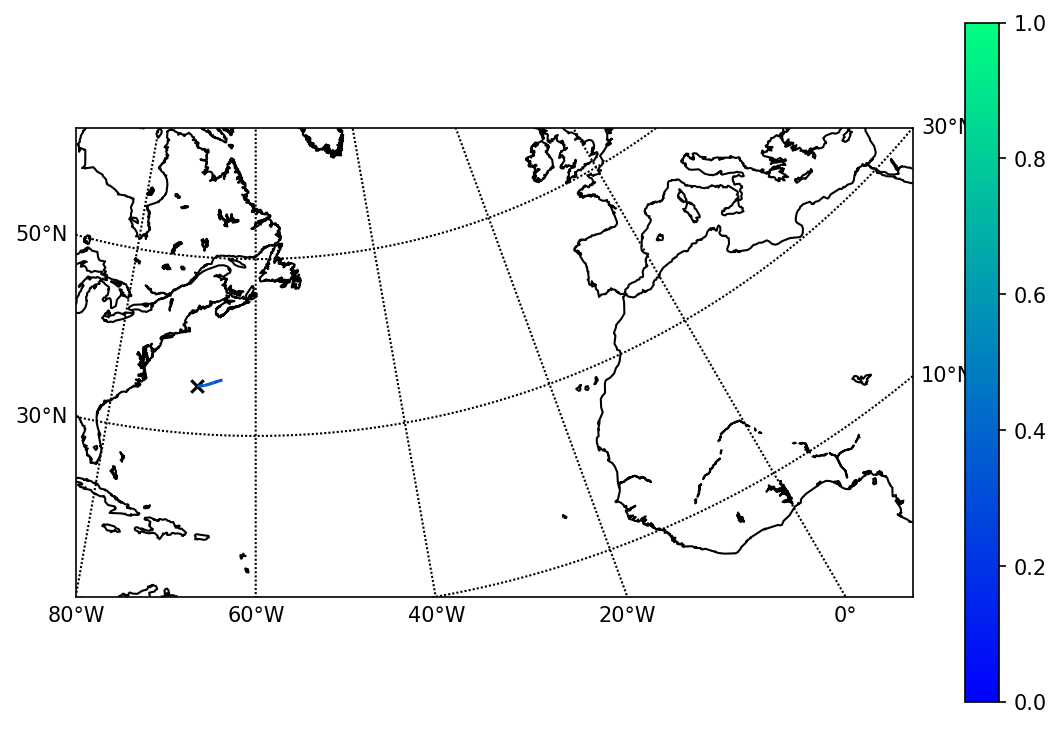

641935


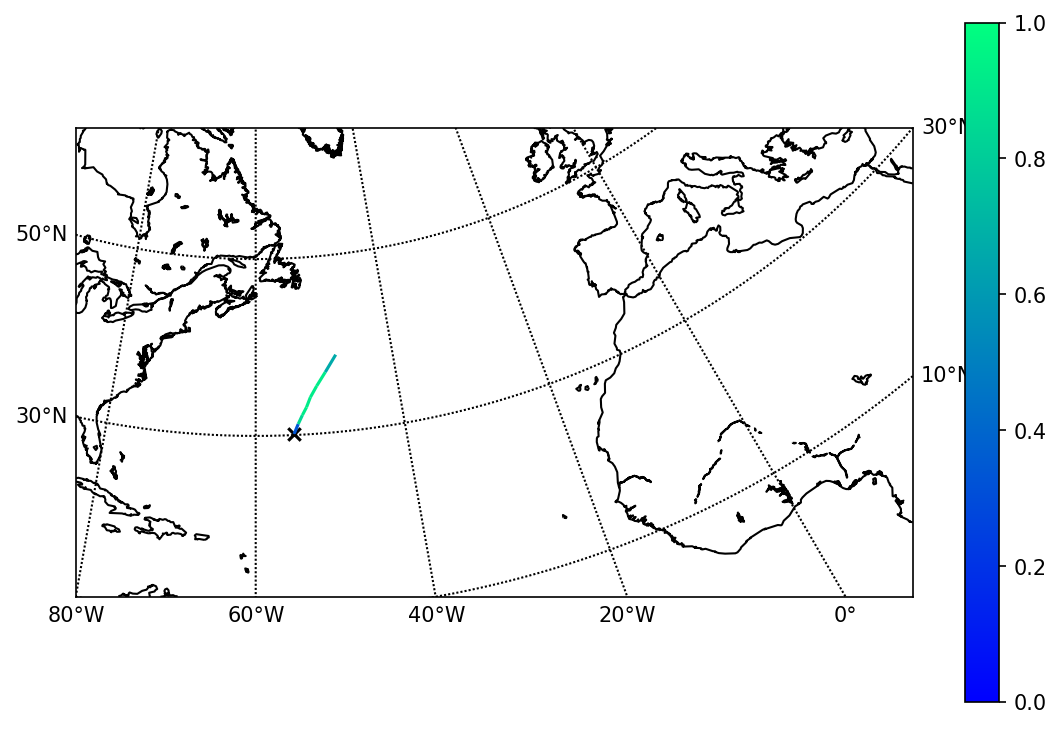

658875


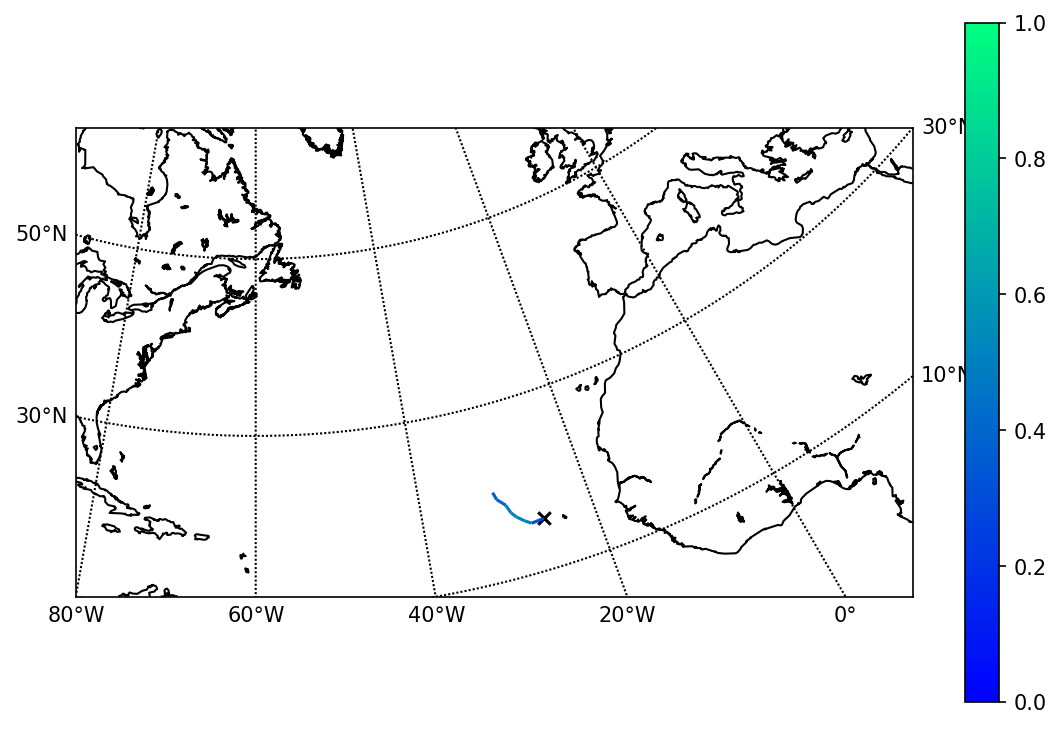

660733


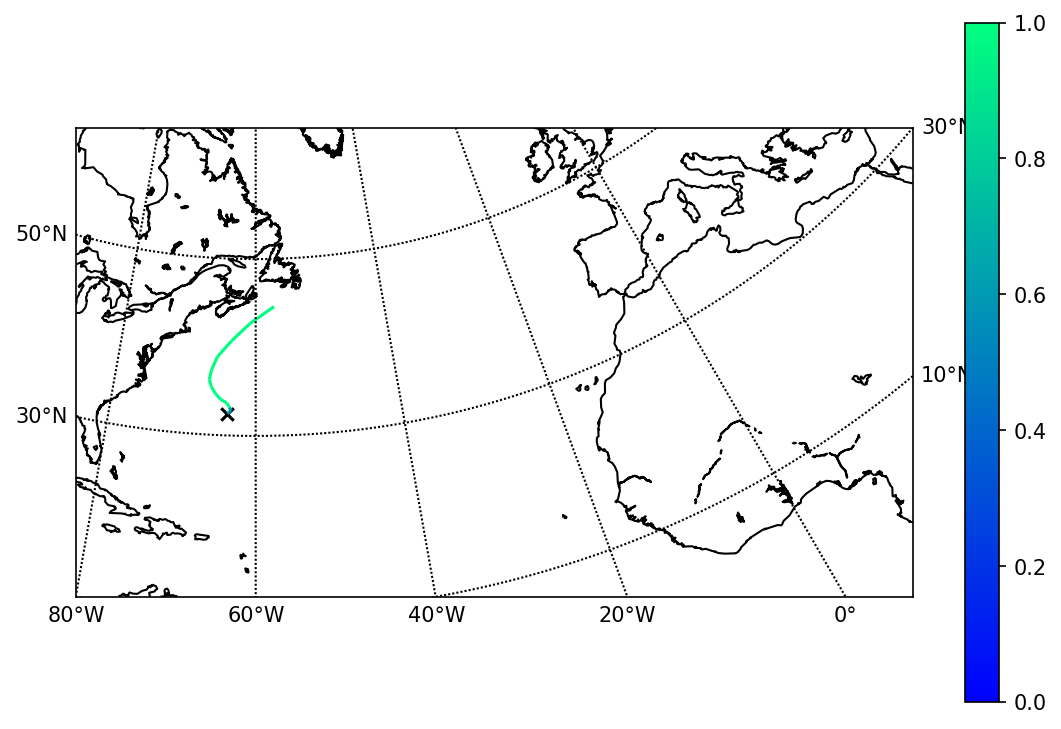

667429


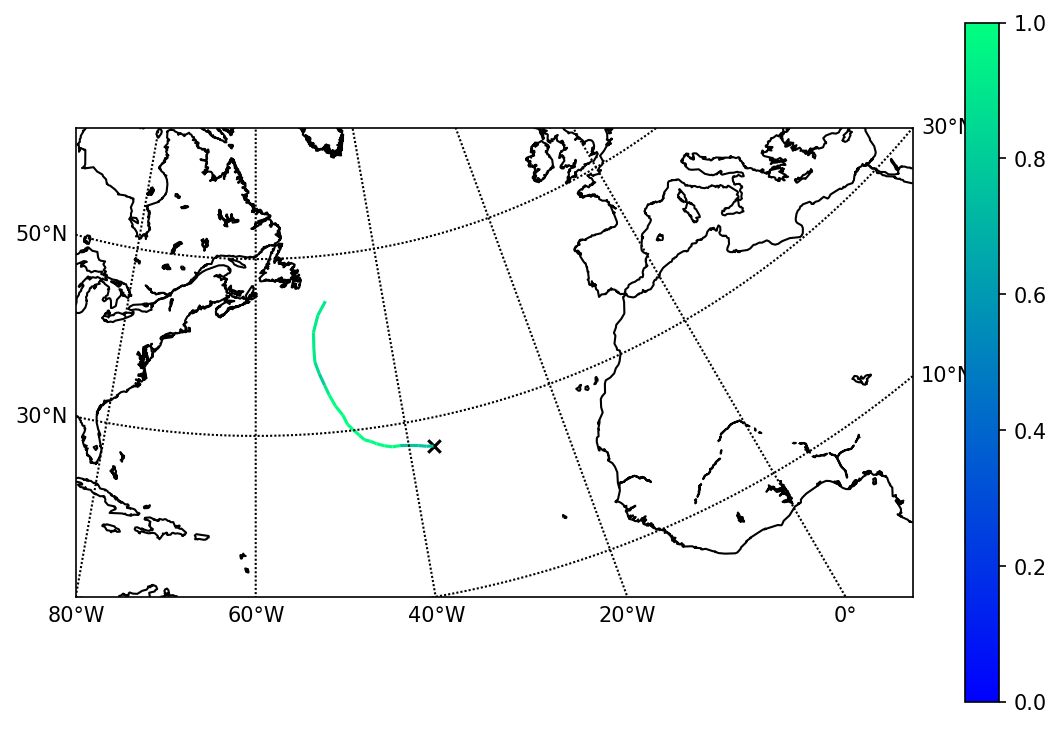

In [156]:
testdf = plotdf[plotdf.lon > -95]
#testdf = testdf.groupby("tc_id").filter(lambda x: x.noccs.mean() > 0.5)
bmap_params = dict(
    llcrnrlon=-80.0,
    llcrnrlat=10.0,
    urcrnrlon=40.0,
    urcrnrlat=30.0,
    projection="lcc",
    lat_1=20.0,
    lat_2=40.0,
    lon_0=-60.0,
    resolution="l",
    area_thresh=1000.0,
)
fig = plot_occurrence(testdf, bmap_params=bmap_params)
print(pd)

351280


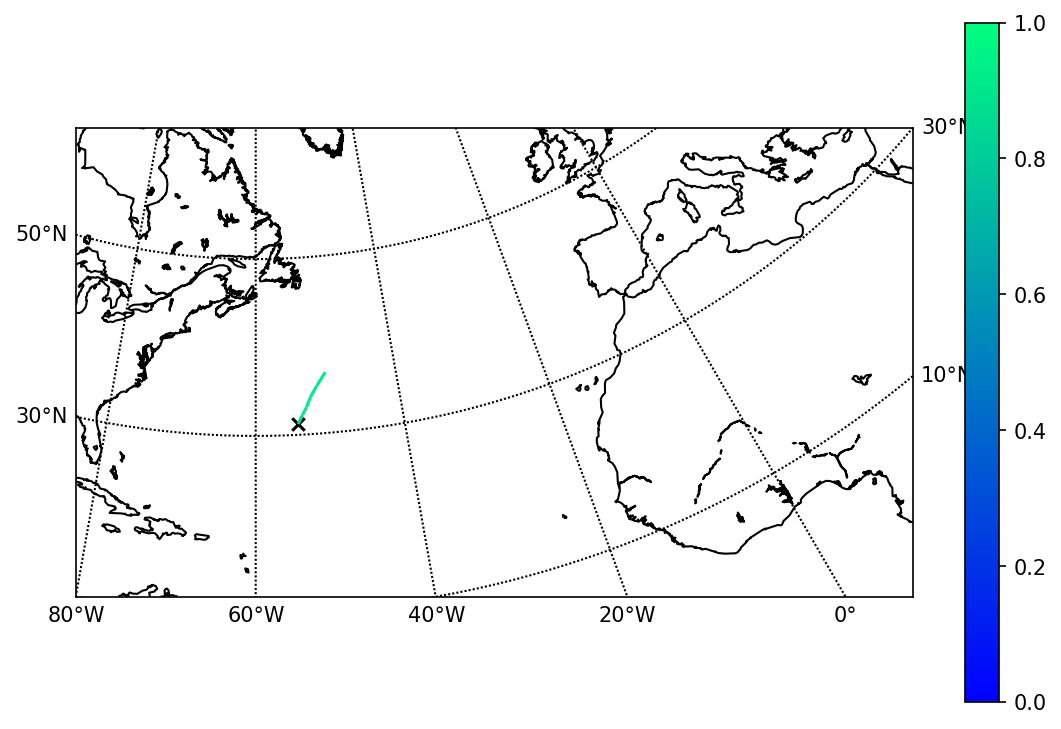

382304


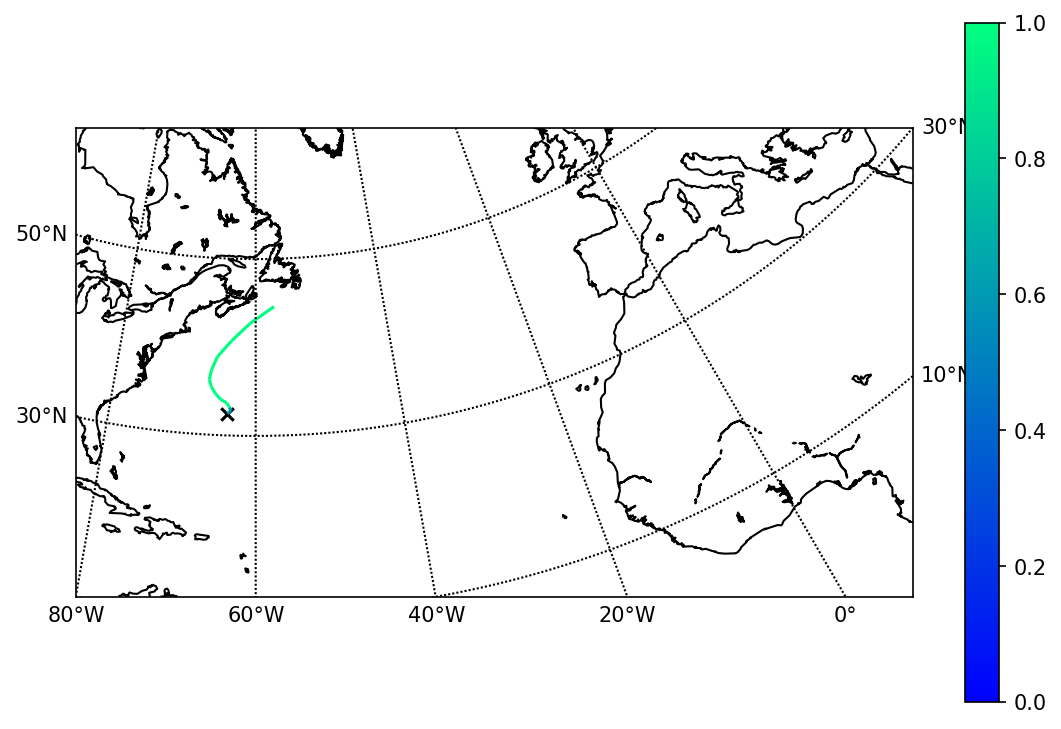

389584


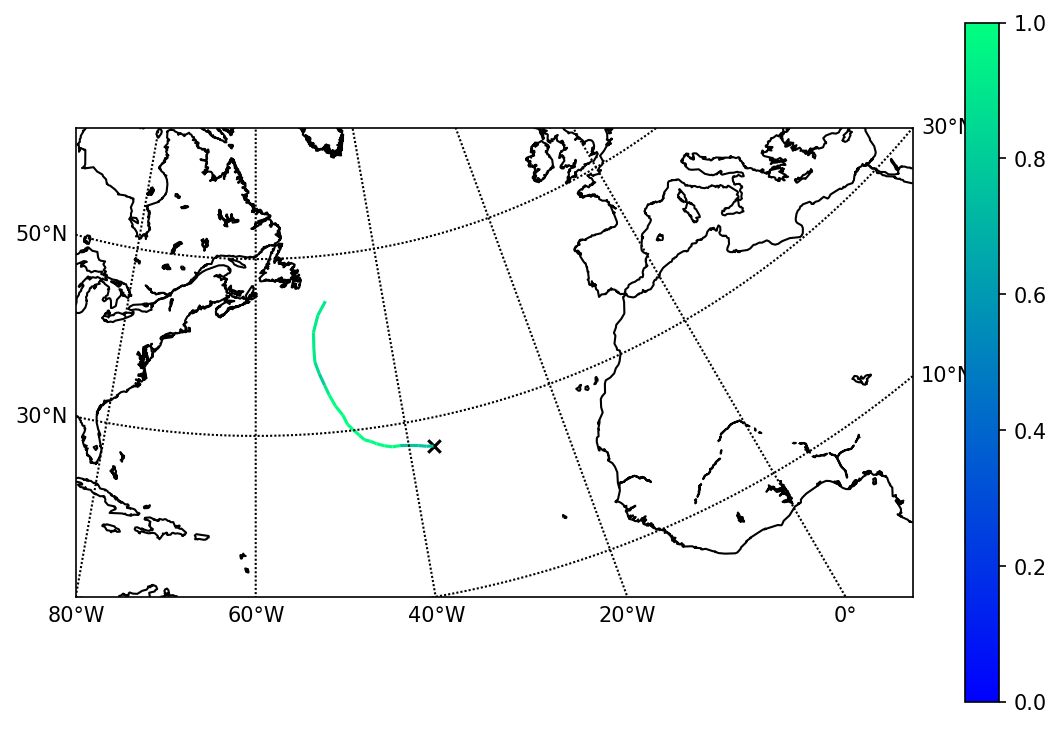

442264


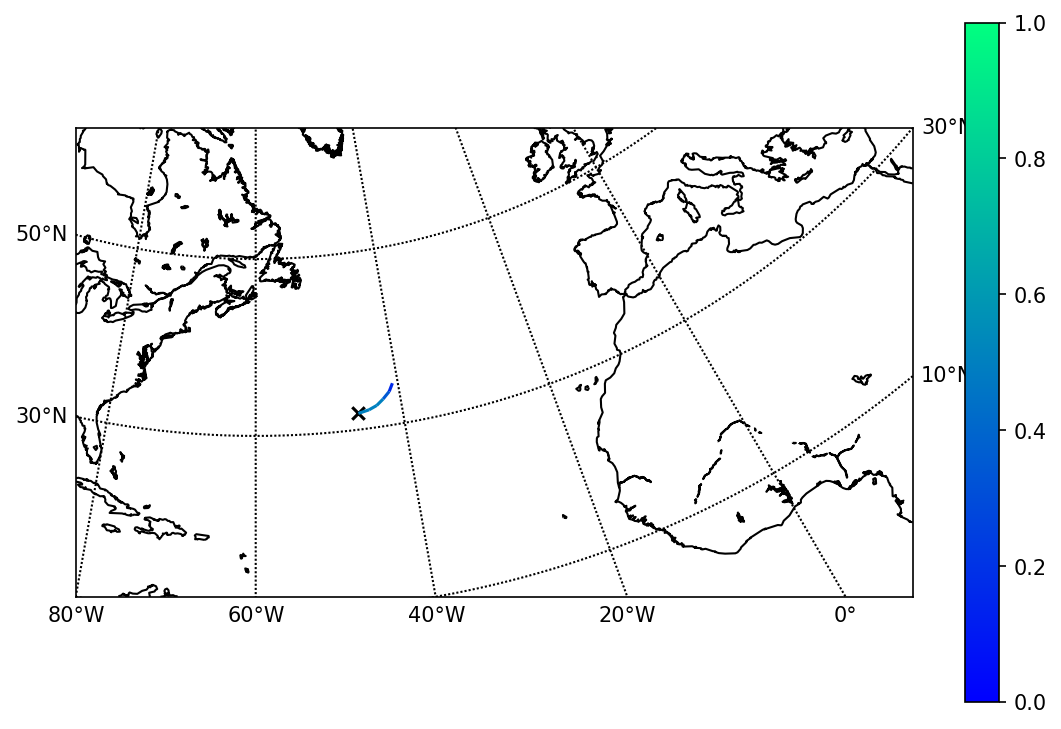

maxhgt       3000.00000
res             0.12500
slpdis     100000.00000
temdif          1.00000
temdis     200000.00000
vormin          0.00001
winddis    100000.00000
Name: 280, dtype: float64


In [157]:
pid = 280
testdf = ordf[ordf.param_id == pid]
testdf = testdf[testdf.lon > -95]
# testdf = testdf.groupby("tc_id").filter(lambda x: x.noccs.mean() > 0.5)
bmap_params = dict(
    llcrnrlon=-80.0,
    llcrnrlat=10.0,
    urcrnrlon=40.0,
    urcrnrlat=30.0,
    projection="lcc",
    lat_1=20.0,
    lat_2=40.0,
    lon_0=-60.0,
    resolution="l",
    area_thresh=1000.0,
)
fig = plot_occurrence(testdf, bmap_params=bmap_params)
print(pdf.loc[pid])

In [4]:
df = dd.read_hdf(algo_data_file, "df")
pdf = dd.read_hdf(algo_data_file, "params").compute()

In [5]:
random_row = df.head(1).iloc[0]
tc_data = load_simulation_data(df.head(1).iloc[0])
d1, d2 = load_complete_datasets(random_row)
lat, lon, latlat, lonlon, latlon = get_coordinates(d1)

In [8]:
exp = "ref"
mem = 1
param_id = 280
params = pdf.loc[param_id]

In [119]:
ordf = df[df.mem == mem]
ordf = ordf[ordf.exp == exp]
ordf = ordf[ordf.genesis_sst > 297.15]
ordf = ordf.compute()

In [120]:
ordf["lifetime"] = ordf.groupby("tc_id")["mem"].transform("size")
ordf["occs"] = ordf.groupby(["date", "lon_idx", "lat_idx"])["tc_id"].transform("size")
ordf["noccs"] = ordf["occs"] / ordf["occs"].max()

In [73]:
filtered = ordf[(ordf.date == datetime(year=2013, month=6, day=26, hour=6))]
fitlered = filtered[(filtered.lon_idx == 19)]
filtered = filtered[(filtered.lat_idx == 133)]
filtered

date  lon_idx  lat_idx      lon     lat           slp  \
idx                                                                           
57623  2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
57677  2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
57731  2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
62843  2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
62897  2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
...                    ...      ...      ...      ...     ...           ...   
868349 2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
869638 2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
901466 2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
902655 2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   
903844 2013-06-26 06:00:00       19      133 -117.625  16.625  98742.070312   

          maxwind  param_id   tc_id  curr_cat  cat  mem  exp  genesis_sst  \
idx                                                                         
57623   31.893486       303   16302         0    0    1  ref   299.692110   
57677   41.204338       304   16316         1    2    1  ref   299.692110   
57731   41.204338       305   16330         1    2    1  ref   299.692110   
62843   31.893486       627   18030         0    0    1  ref   299.692110   
62897   41.204338       628   18044         1    2    1  ref   299.692110   
...           ...       ...     ...       ...  ...  ...  ...          ...   
868349  40.060936       870  213925         1    2    1  ref   300.901802   
869638  38.268185       960  214195         1    2    1  ref   300.901802   
901466  41.104969       781  222249         1    2    1  ref   300.901802   
902655  40.060936       871  222579         1    2    1  ref   300.901802   
903844  38.268185       961  222909         1    2    1  ref   300.901802   

        lifetime  occs  
idx                     
57623          3   594  
57677          3   594  
57731          3   594  
62843          3   594  
62897          3   594  
...          ...   ...  
868349        12   594  
869638        12   594  
901466        12   594  
902655        12   594  
903844        12   594  

[594 rows x 16 columns]

In [122]:
plotdf = ordf[ordf.param_id == 253]

In [121]:
pgrid = get_qgrid(pdf)
pgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…